# ML Model: Second Iteration.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Observations from the first iteration.
* Make sure there is no class imbalance (16% dropout, 84% stay, this class is imbalanced), balance it if needed.

* Increase training data size and don't touch the test set.

* There is no need to scale the data here.

* Try using feature selection.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ml_df.xlsx', na_values='#N/D')
df.head()

,id,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impact,edad_cat
0,1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,...,Baja,0,8,0,6,0,5,71916,14670.864,>=30
1,2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,>=30
2,4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,...,Media,0,7,3,0,0,0,25080,4037.880,>=30
3,5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,...,Alta,0,8,3,8,3,0,34908,6876.876,>=30
4,7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,<30


In [ ]:
# First make a copy of the dataset
ml_df = df.copy()
ml_df.head()

,id,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impact,edad_cat
0,1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,...,Baja,0,8,0,6,0,5,71916,14670.864,>=30
1,2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,>=30
2,4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,...,Media,0,7,3,0,0,0,25080,4037.880,>=30
3,5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,...,Alta,0,8,3,8,3,0,34908,6876.876,>=30
4,7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,<30


In [ ]:
# Import train_test_split and OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Categorical
cat = ml_df.select_dtypes('O')
ohe = OneHotEncoder(sparse_output = False)
ohe.fit(cat)
cat_ohe = ohe.transform(cat)
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

# Numerical
num = ml_df.select_dtypes('number').reset_index(drop = True)

# Combine Categorical and Numerical
ml_df = pd.concat([cat_ohe,num], axis = 1)
ml_df.head(5)

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impact
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352


## Feature selection
Select features that are relevant to the model.

In [ ]:
ml_df = ml_df[['abandono', 'horas_extra_Yes', 'num_empresas_anteriores', 'anos_experiencia',
               'distancia_casa', 'nivel_acciones', 'edad', 'salario_mes', 'incremento_salario_porc',
               'anos_compania', 'anos_desde_ult_promocion', 'num_formaciones_ult_ano', 'anos_con_manager_actual',
               'departamento_Sales', 'viajes_Travel_Frequently', 'satisfaccion_trabajo_Baja', 'educacion_Primaria',
               'estado_civil_Single', 'satisfaccion_companeros_Baja', 'satisfaccion_entorno_Baja', 'nivel_laboral']]

## Building the model.

In [ ]:
# Define X and y
X = ml_df.drop(columns=['abandono'])
y = ml_df['abandono']
y.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: abandono, dtype: float64

We observe a class imbalance in 'abandono' of around 8 times the minority class. That means we have very few samples of employees who churned, compared to the ones who stayed at the company.

In [ ]:
# Install the neccesary packages for imbalaced class.
# pip install imbalanced-learn

Text(0.5, 1.0, 'Re-sample. Churn: 0, No Churn: 1')

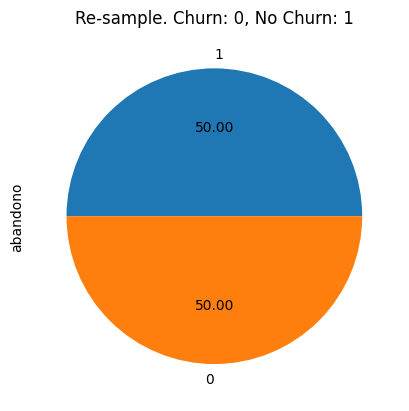

In [ ]:
# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

# Re-sample the data
ros = RandomOverSampler(sampling_strategy='not majority')
X_res, y_res = ros.fit_resample(X, y)

# Plot the re-sample
ax = y_res.value_counts().plot.pie(autopct='%.2f')
ax.set_title('Re-sample. Churn: 0, No Churn: 1')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.5, random_state=123)

# Fit the model
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train, y_train)

# Make predictions using X_test
predictions_scaled = dtc.predict_proba(X_test)[:, 1]

# How good is the model?
roc_auc_score(y_test, predictions_scaled)

0.7653821056066011

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Primero RandomizedSearchCV despues GridSearchCV

# Hyperparameter Tuning
params = {'max_depth': np.arange(2, 10),
          'min_samples_split':np.arange(2, 10),
          'min_samples_leaf': np.arange(2, 6)}

# Instantiate a KFold cross validator
kf = KFold(n_splits=5, random_state=123, shuffle=True)

# Instantiate a DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# Perform the Cross Validation
cross_validation = GridSearchCV(dt, params, cv=kf) #refit=True
cross_validation.fit(X_train, y_train)

# Check which parameters are the best
print("Tuned DecisionTreeClassifier Parameters: {}".format(cross_validation.best_params_))
print("Tuned DecisionTreeClassifier Best Accuracy Score: {}".format(cross_validation.best_score_))

Tuned DecisionTreeClassifier Parameters: {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2}
Tuned DecisionTreeClassifier Best Accuracy Score: 0.8061452881735296


In [ ]:
# Instantiate a tuned DecisionTreeClassifier
dtc_tuned = DecisionTreeClassifier(max_depth=9, min_samples_split=2, min_samples_leaf=2)
dtc_tuned.fit(X_train, y_train)

# Make predictions
predictions_tuned = dtc_tuned.predict_proba(X_test)[:, 1]

# Set y_pred
y_pred = dtc_tuned.predict(X_test)

# Get the roc_auc_score of the tuned model.
roc_auc_score(y_test, predictions_tuned)

0.8834633155462936

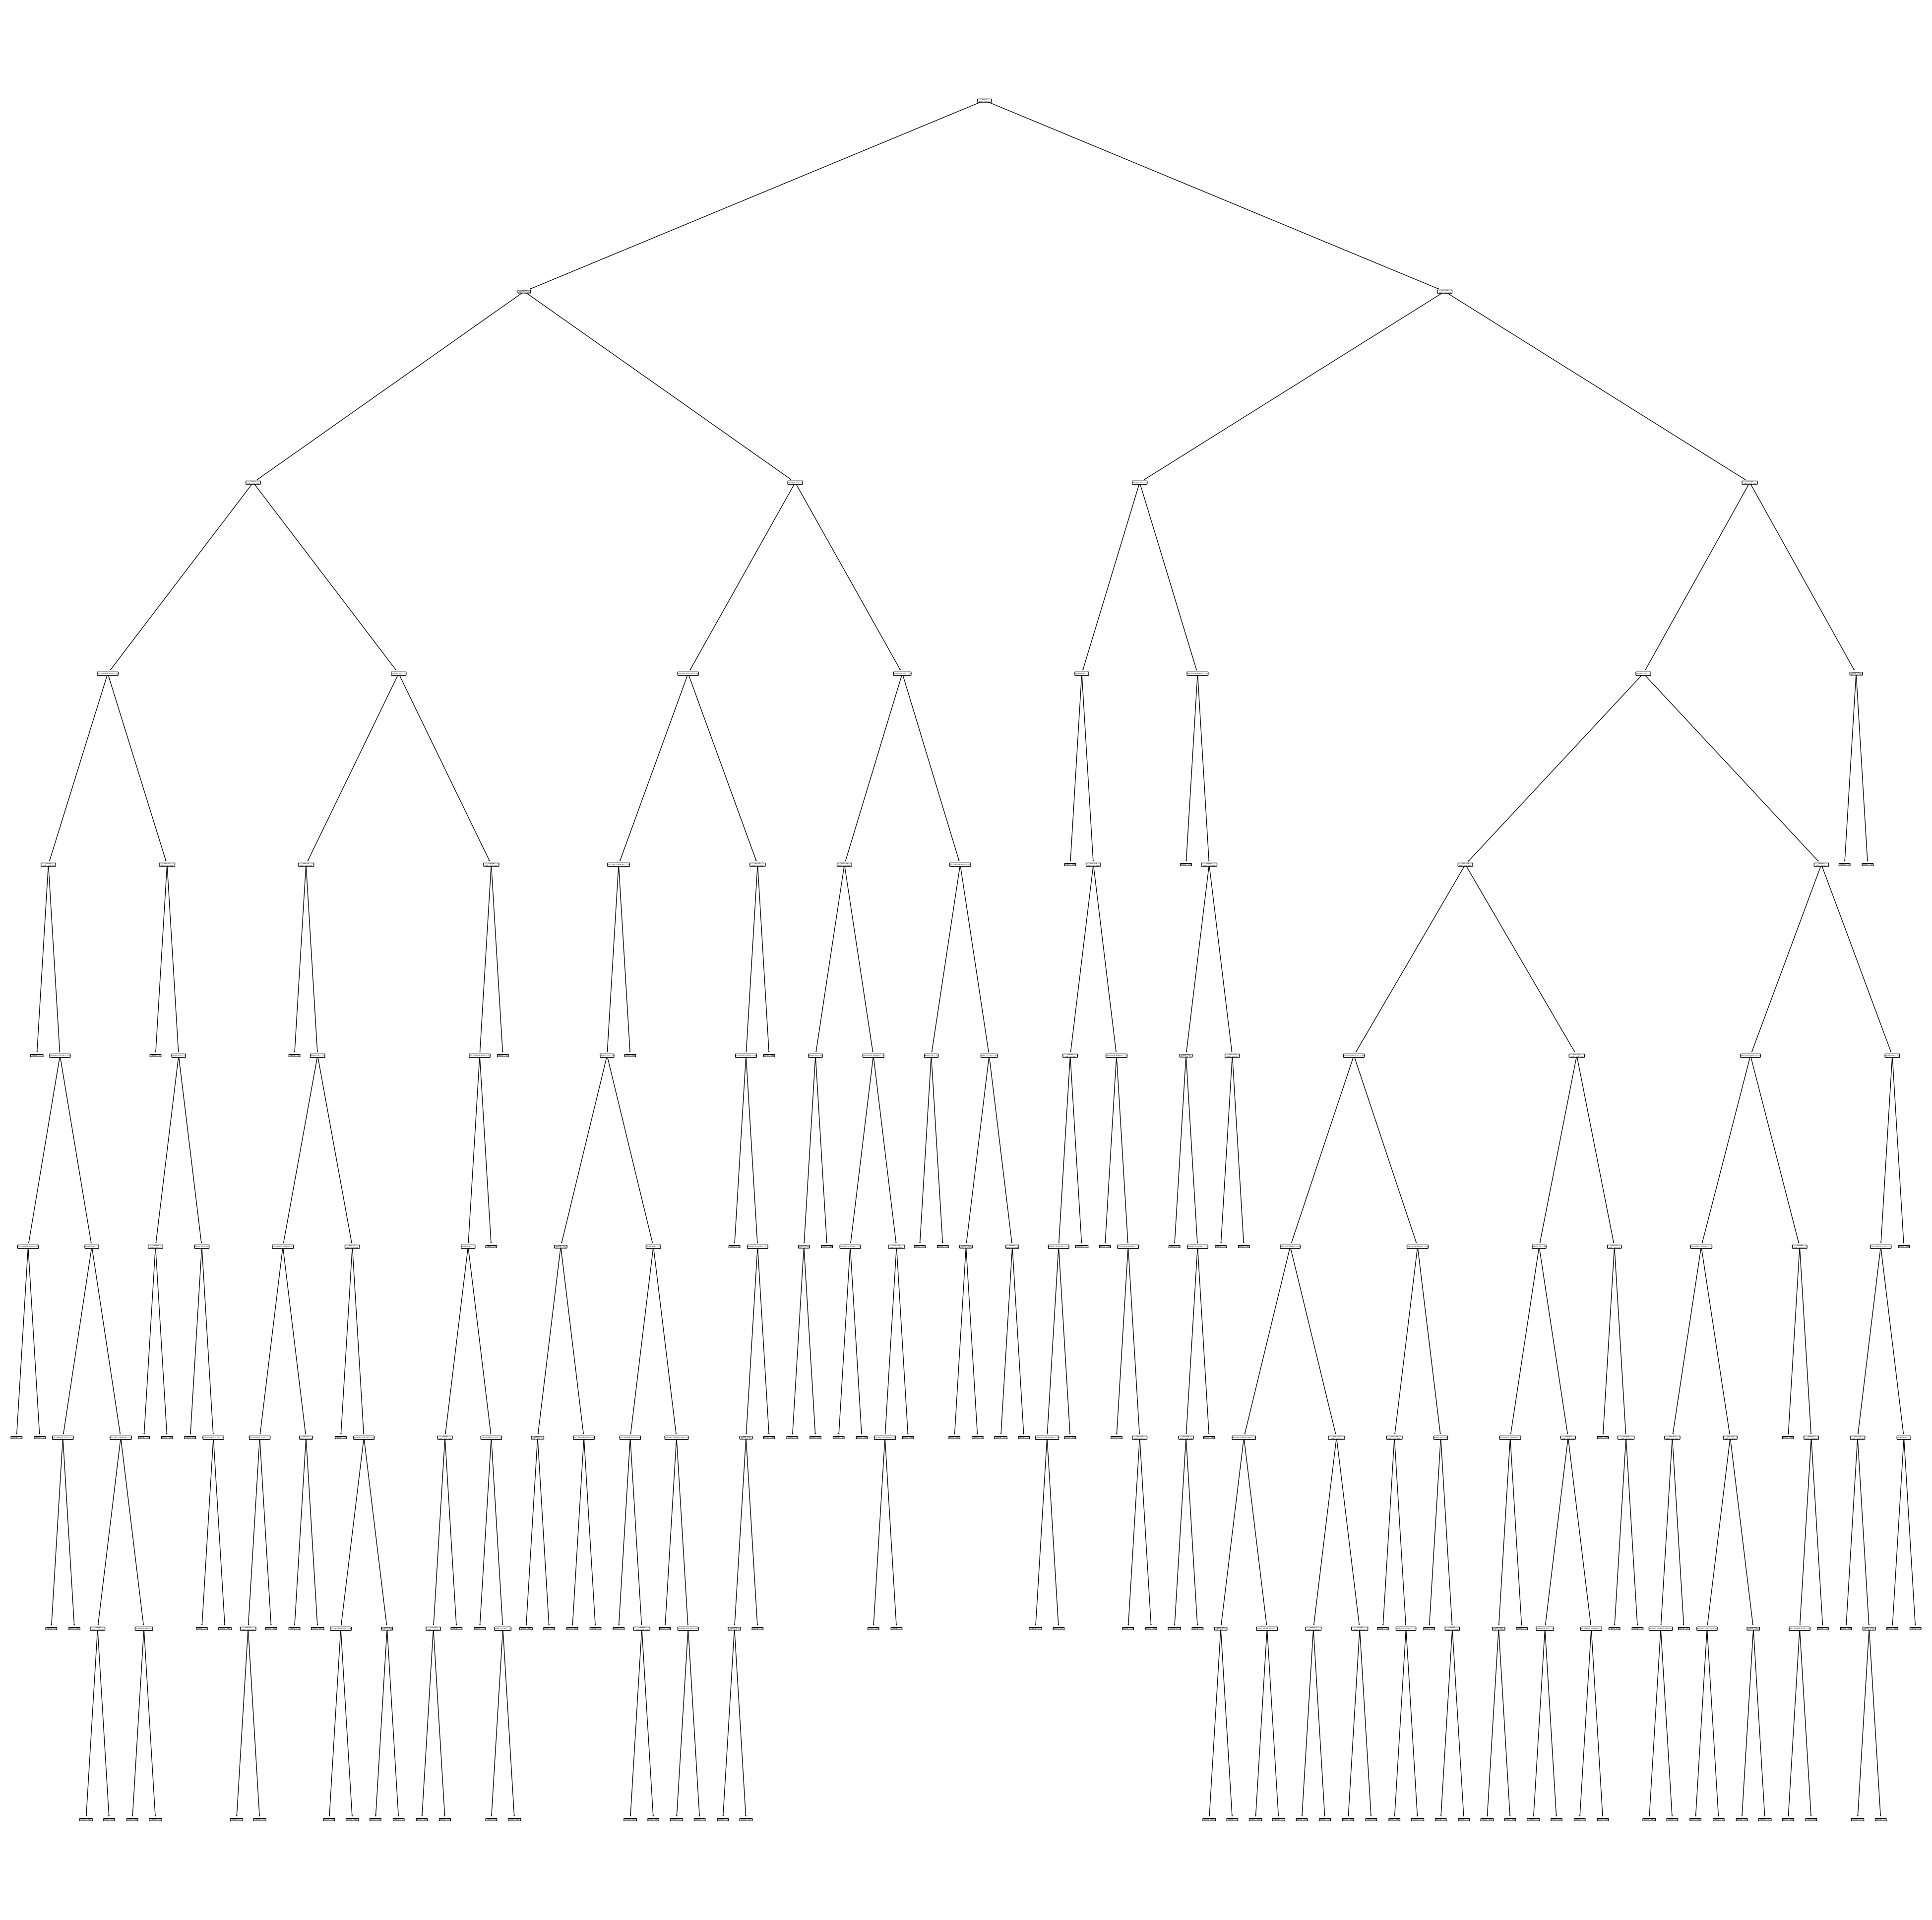

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(dtc_tuned,
          feature_names= X_test.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

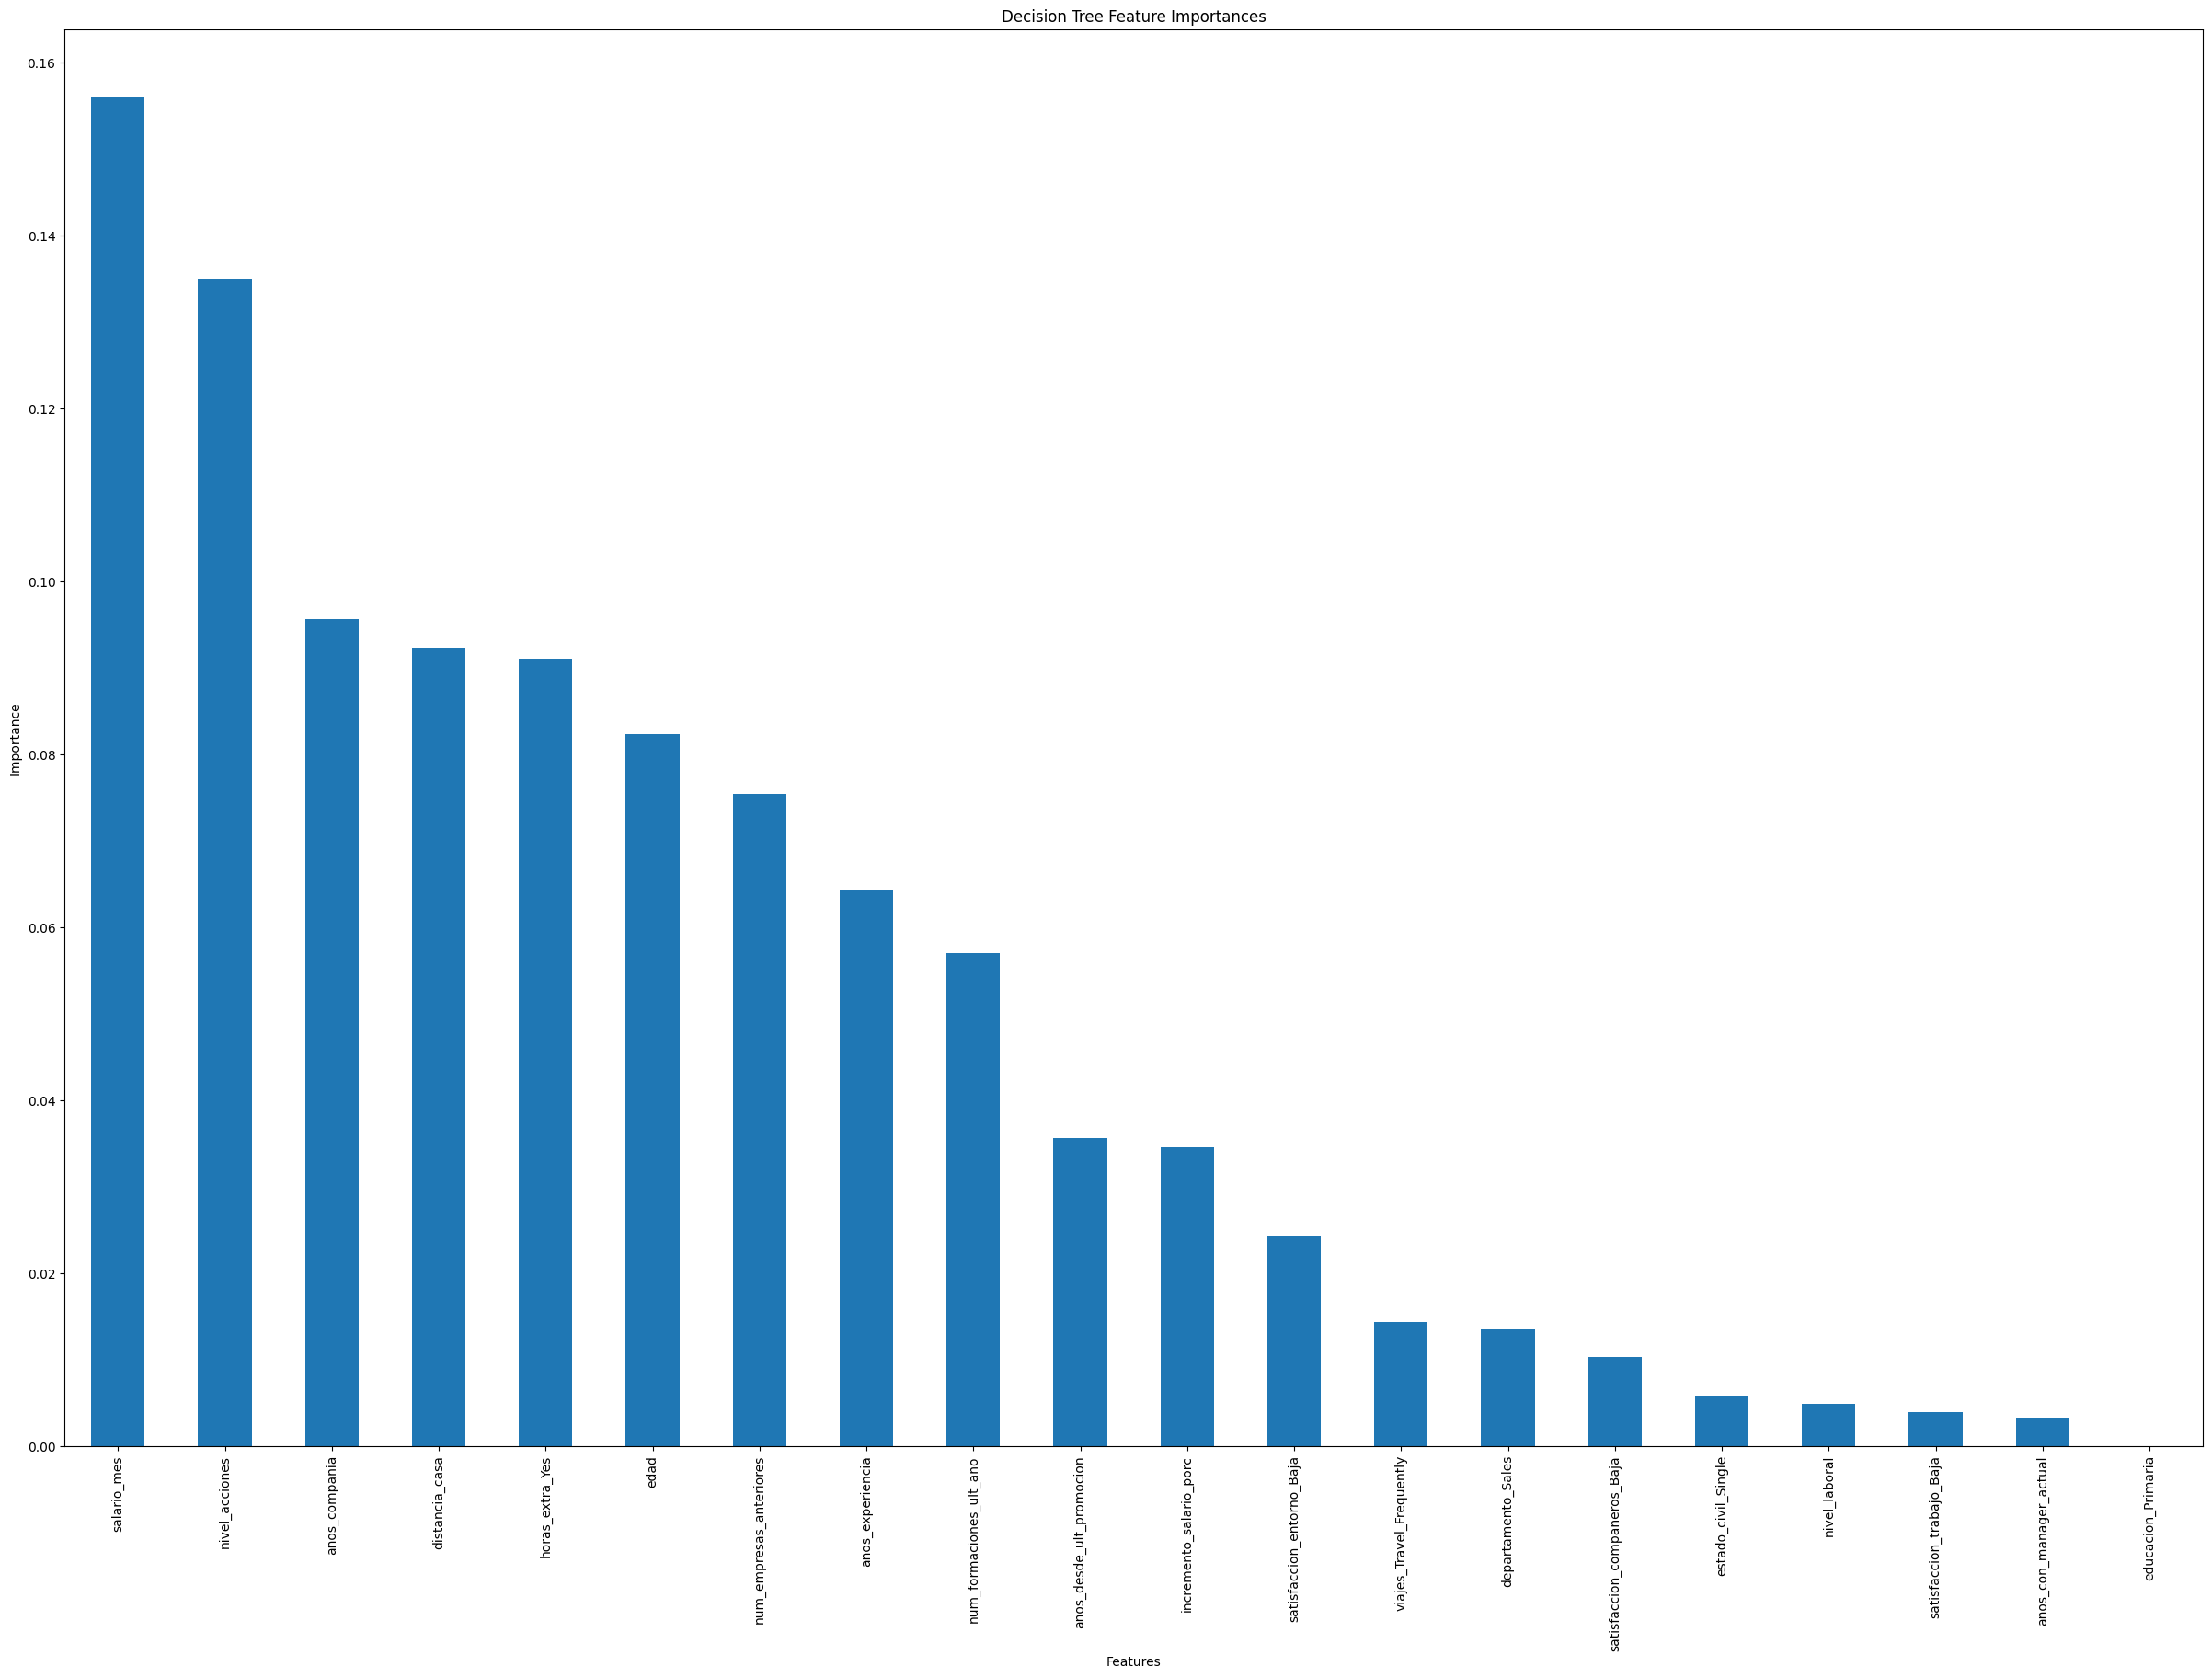

In [ ]:
a = pd.Series(dtc_tuned.feature_importances_,index = X_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importances')
plt.show()

Now let's take a look at the confusion matrix.

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print it
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[487, 125],
       [ 91, 530]])

Let's make the visualization clearer

In [ ]:
from sklearn.utils.multiclass import unique_labels
def df_confusion_matrix(y_test, y_pred):
  '''

  '''
  try:
    labels = unique_labels(y_test)
    columns = [f'Prediceted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test, y_pred),
                          columns=columns, index=index)
  except Exception:
    ValueError()
  return table

In [ ]:
df_confusion_matrix(y_test, y_pred)

,Prediceted 0,Prediceted 1
Actual 0,487,125
Actual 1,91,530
